In [1]:
# 前処理
# 使ったデータはExcel形式: URLは以下
# https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00200502&kikan=00200&tstat=000001112055&cycle=0&tclass1=000001112057&result_page=1&second=1&second2=1

#xlrd: Excelファイルの読み出し
import xlrd

#Pythonの中でExcelワークブックを開く
book  = xlrd.open_workbook('2018基礎データ.xlsx')

#sheet_by_nameでsheet名を指定
sheet = book.sheet_by_name('A')

#第row行目を返す関数
def output_nrows(row):
    return sheet.row_values(row - 1)

#indexを作成
#list5をつくる
def cell_returner_revised(row, waste):
    data = []
    for i in range(217):
        cell = sheet.row_values(row-1)[i]
        if len(cell):
            if not waste in cell:
                char = cell.replace('\u3000', '')
                data.append(char)
    return data

list5  = cell_returner_revised(5, '都')
#list6をつくる
list6=['','[男]','[女]','','','','','[男]','[女]','','[男]','[女]','','[男]','[女]','',
         '[男]','[女]','[男]','[女]','[男]','[女]','[男]','[女]','[男]','[女]','[男]','[女]','[男]','[女]',
         '','','','','[0~4歳]','[65歳以上]','','','','[従業地・通学地人口]','[従業地・通学地人口]',
         '','','','','','','','','','','','','','']

#list5とlist6を上のようにつなげてindexをつくる
index = []
for i in range(54):
    for j in range(54):
        if i==j:
            index.append(list5[i] + list6[j])

#index_ENをつくる
index_EN = cell_returner_revised(8, '県')

#辞書をつくる
#辞書を返す関数
#関数化
def prefecture_data_returner(sheet, column):
    
    #各行の2015年のデータを抽出する関数
    def return_2015(row):
        #pandas のインポート
        import pandas as pd
    
        #yearの情報を抽出(12行目)
        year_list = output_nrows(12)
        year_df = pd.DataFrame(year_list, columns=['year'])
        #prefectureの情報を抽出
        prefecture_value_list = output_nrows(row + 1)
        prefecture_value_df = pd.DataFrame(prefecture_value_list, columns=['value'])

        df = pd.concat([ prefecture_value_df, year_df], axis=1)
        data_2015 = df[df['year']=='2015']['value'].tolist()
        return data_2015

    #空辞書を作成
    data={}
    #13行から60行目(61-13=48(全都道府県+1)となることも確認)を取り出す
    for j in range(13, 61):
        #sheetのj行目のデータを変数rowに格納する
        row = sheet.row_values(j)
        #rowに関数return_2015を施したものを変数valueに格納する
        value = return_2015(j)
        #prefectureのデータは各行の第column要素なのでスライスを使って以下のように取り出す
        prefecture = row[column]
        #辞書dataに加える. (key=prefecture, value=value)
        data[prefecture] = value
    return data

#関数の適用
prefecture_data_JN = prefecture_data_returner(sheet, 1)
prefecture_data_EN = prefecture_data_returner(sheet, 2)
prefecture_data_JN


#データフレーム化
#pandasのインポート
import pandas as pd

#日本語版DataFrame
df_JN = pd.DataFrame(prefecture_data_JN, index=index)
#英語版DataFrame
df_EN = pd.DataFrame(prefecture_data_EN, index=index_EN)

#DataFrameの転置
df_JN = df_JN.T
df_EN = df_EN.T
df_JN.head()

,人口総数,人口総数[男],人口総数[女],日本人人口,外国人人口,住民基本台帳人口（総数）,年少人口（15歳未満人口）,年少人口（15歳未満人口）[男],年少人口（15歳未満人口）[女],生産年齢人口（15～64歳人口）,...,核家族世帯数,共働き世帯数,単独世帯数,65歳以上の世帯員のいる世帯数,高齢夫婦のみの世帯数,高 齢 単 身 世 帯 数,母子世帯数,父子世帯数,婚姻件数,離婚件数
全 国,127094745.0,61841738.0,65253007.0,124283901.0,1752368.0,128066211.0,15886810.0,8133536.0,7753274.0,76288736.0,...,29754438.0,13080450.0,18417922.0,21713308.0,6079126.0,5927686.0,754724.0,84003.0,635156.0,226215.0
北 海 道,5381733.0,2537089.0,2844644.0,5348768.0,21676.0,5401210.0,608296.0,310387.0,297909.0,3190804.0,...,1363818.0,515458.0,909106.0,999133.0,327509.0,319408.0,45651.0,4481.0,25465.0,11211.0
青 森 県,1308265.0,614694.0,693571.0,1302132.0,3447.0,1338465.0,148208.0,75661.0,72547.0,757867.0,...,271241.0,140439.0,153443.0,252984.0,56383.0,61580.0,9415.0,973.0,5432.0,2267.0
岩 手 県,1279594.0,615584.0,664010.0,1272745.0,5017.0,1289470.0,150992.0,77222.0,73770.0,734886.0,...,251014.0,146016.0,148575.0,245190.0,53475.0,53398.0,7126.0,828.0,5243.0,1956.0
宮 城 県,2333899.0,1140167.0,1193732.0,2291508.0,13989.0,2324466.0,286003.0,146491.0,139512.0,1410322.0,...,483580.0,231991.0,323890.0,380365.0,90047.0,85398.0,12767.0,1327.0,11317.0,3987.0


In [2]:
df_JN.columns

Index(['人口総数', '人口総数[男]', '人口総数[女]', '日本人人口', '外国人人口', '住民基本台帳人口（総数）',
       '年少人口（15歳未満人口）', '年少人口（15歳未満人口）[男]', '年少人口（15歳未満人口）[女]',
       '生産年齢人口（15～64歳人口）', '生産年齢人口（15～64歳人口）[男]', '生産年齢人口（15～64歳人口）[女]',
       '老年人口（65歳以上人口）', '老年人口（65歳以上人口）[男]', '老年人口（65歳以上人口）[女]',
       '老齢人口（70歳以上人口）', '有配偶人口20～24歳[男]', '有配偶人口20～24歳[女]', '有配偶人口25～29歳[男]',
       '有配偶人口25～29歳[女]', '有配偶人口30～34歳[男]', '有配偶人口30～34歳[女]', '有配偶人口35～39歳[男]',
       '有配偶人口35～39歳[女]', '死別人口60歳以上[男]', '死別人口60歳以上[女]', '離別人口40～49歳[男]',
       '離別人口40～49歳[女]', '離別人口50～59歳[男]', '離別人口50～59歳[女]', '人 口 集 中 地 区 人 口',
       '人 口 集 中 地 区 面 積', '出生数', '死亡数', '死亡数[0~4歳]', '死亡数[65歳以上]', '転入者数',
       '転出者数', '昼間人口', '流入人口[従業地・通学地人口]', '流出人口[従業地・通学地人口]', '総世帯数', '一般世帯数',
       '一般世帯人員', '核家族世帯数', '共働き世帯数', '単独世帯数', '65歳以上の世帯員のいる世帯数', '高齢夫婦のみの世帯数',
       '高 齢 単 身 世 帯 数', '母子世帯数', '父子世帯数', '婚姻件数', '離婚件数'],
      dtype='object')

In [3]:
#各ライブラリを用意
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 目的変数「男女比」をつくる
# 男女比 = 男性人口総数 / 女性人口総数 を100分率で表した。
df_JN['男女比'] = 100 * (df_JN['人口総数[男]'] / df_JN['人口総数[女]'] )

In [5]:
# 上から10県のデータを出力
df_JN[['男女比']].head(10)

,男女比
全 国,94.772242
北 海 道,89.188278
青 森 県,88.627408
岩 手 県,92.707038
宮 城 県,95.512812
秋 田 県,88.495034
山 形 県,92.557546
福 島 県,97.653914
茨 城 県,99.331138
栃 木 県,98.891529


In [6]:
# 列名を出力
df_JN.columns

Index(['人口総数', '人口総数[男]', '人口総数[女]', '日本人人口', '外国人人口', '住民基本台帳人口（総数）',
       '年少人口（15歳未満人口）', '年少人口（15歳未満人口）[男]', '年少人口（15歳未満人口）[女]',
       '生産年齢人口（15～64歳人口）', '生産年齢人口（15～64歳人口）[男]', '生産年齢人口（15～64歳人口）[女]',
       '老年人口（65歳以上人口）', '老年人口（65歳以上人口）[男]', '老年人口（65歳以上人口）[女]',
       '老齢人口（70歳以上人口）', '有配偶人口20～24歳[男]', '有配偶人口20～24歳[女]', '有配偶人口25～29歳[男]',
       '有配偶人口25～29歳[女]', '有配偶人口30～34歳[男]', '有配偶人口30～34歳[女]', '有配偶人口35～39歳[男]',
       '有配偶人口35～39歳[女]', '死別人口60歳以上[男]', '死別人口60歳以上[女]', '離別人口40～49歳[男]',
       '離別人口40～49歳[女]', '離別人口50～59歳[男]', '離別人口50～59歳[女]', '人 口 集 中 地 区 人 口',
       '人 口 集 中 地 区 面 積', '出生数', '死亡数', '死亡数[0~4歳]', '死亡数[65歳以上]', '転入者数',
       '転出者数', '昼間人口', '流入人口[従業地・通学地人口]', '流出人口[従業地・通学地人口]', '総世帯数', '一般世帯数',
       '一般世帯人員', '核家族世帯数', '共働き世帯数', '単独世帯数', '65歳以上の世帯員のいる世帯数', '高齢夫婦のみの世帯数',
       '高 齢 単 身 世 帯 数', '母子世帯数', '父子世帯数', '婚姻件数', '離婚件数', '男女比'],
      dtype='object')

In [7]:
# 特徴量が多いのでdf_JNの一部をピックアップ
df_pickup = df_JN.loc[:, ['人口総数', '年少人口（15歳未満人口）',  '老年人口（65歳以上人口）', 
                      '外国人人口','出生数','死亡数',  '男女比']]

df_pickup2 = df_JN.loc[:, ['人口総数', '人 口 集 中 地 区 面 積', '昼間人口', '核家族世帯数',
                          '高 齢 単 身 世 帯 数', '婚姻件数', '離婚件数', '男女比' ]]

<Figure size 144x144 with 0 Axes>

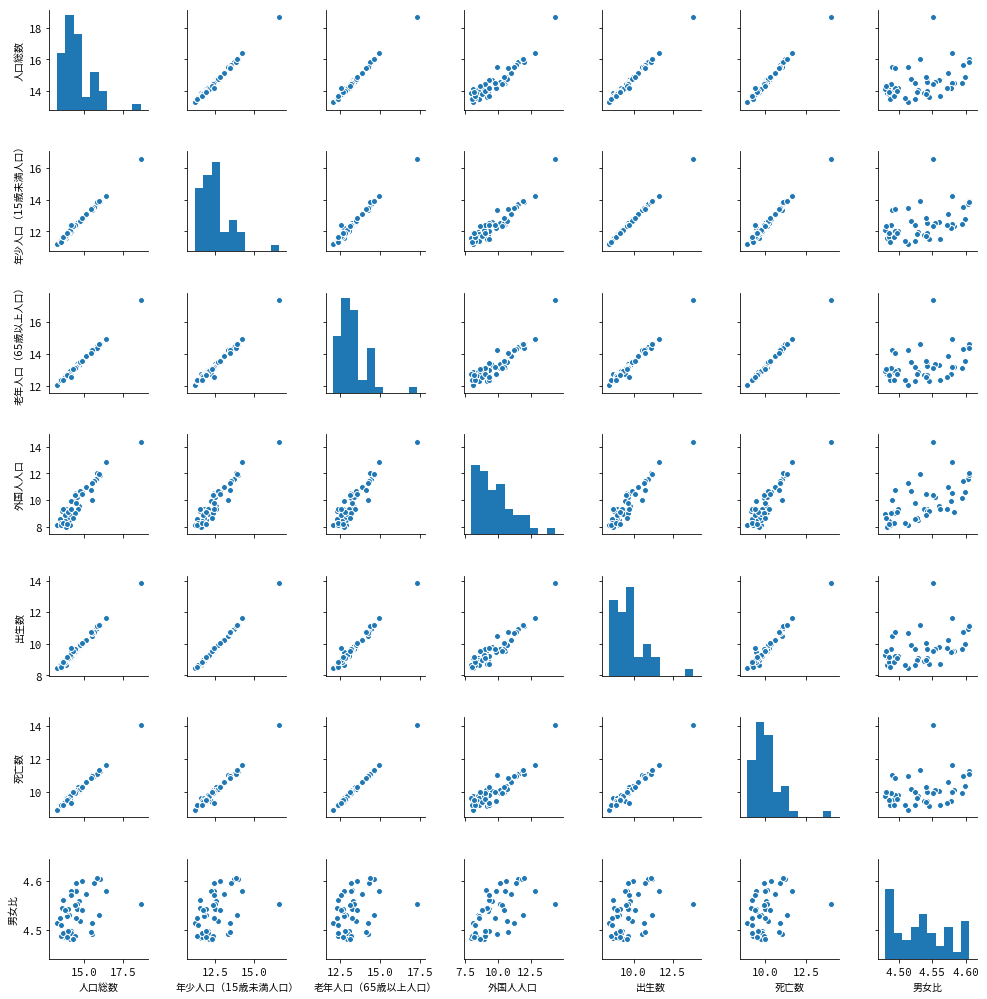

In [8]:
import seaborn as sns 
plt.figure(figsize=(2, 2)) # プロットサイズを設定
sns.pairplot(np.log(df_pickup), size=2.0) # df_pickupの変数の全ての組み合わせについて散布図を出力

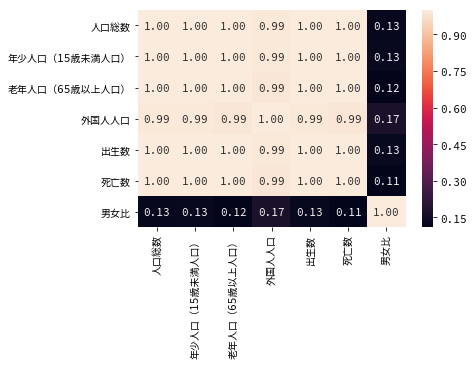

In [9]:
# df_pickupの分散・共分散行列を見やすいヒートマップ形式にて出力
sns.heatmap(df_pickup.corr(), annot=True, fmt='.2f')

### 考察:
　目的変数である「男女比」を除く、説明変数間の相関が非常に高い。

　こうした場合、特徴量が複数あっても、1つの特徴量の説明力と、全ての特徴量での説明力はほぼ等しくなる。実際に主成分分析をしてみると図と主成分分析の寄与率から、そのことがよくわかる。
 
 - 図を見るとほとんどが第1主成分上に乗っている。
 - 第1主成分寄与率が異常に高い

In [10]:
# 男女比以外の変数(説明変数)の列を抽出
X1 = df_pickup.loc[:, df_pickup.columns != "男女比"].values

[[ 1.65641873e+01 -1.04345929e-01 -5.54286853e-03 -2.82157452e-03]
 [-7.54386911e-02 -1.96962442e-01 -2.69874174e-02  1.46728094e-02]
 [-5.60685872e-01 -5.56813329e-02 -1.48412870e-02 -8.18400931e-04]
 [-5.59585875e-01 -4.88790570e-02 -1.23546647e-02 -8.12505070e-04]
 [-4.38001564e-01 -5.83849816e-02  1.37963854e-02  4.92771041e-04]
 [-5.93051576e-01 -4.53482408e-02 -2.40323642e-02  1.89135132e-03]
 [-5.75066325e-01 -3.98590648e-02 -1.24357601e-02 -1.73358567e-03]
 [-4.78754972e-01 -6.87037360e-02 -1.13565805e-02 -6.88740855e-03]
 [-3.22216476e-01  3.56615333e-03 -1.04499077e-02  1.67729993e-03]
 [-4.52530284e-01 -2.96942981e-04  6.31466565e-05 -8.96328891e-04]]


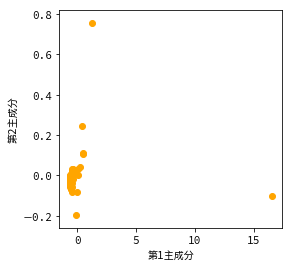

第一主成分の寄与率 第二主成分の寄与率 ... =  [9.97255362e-01 2.65543899e-03 6.99232348e-05 1.08576403e-05]

累積寄与率 =  [0.99725536 0.9999108  0.99998072 0.99999158]


In [11]:
# 主成分分析の概要を出力する関数

def pca_summary(X):
    """
    X:arrayを受け取って、
    1. 主成分の一部を出力
    2. PC0とPC1について散布図を表示
    3. 寄与率、累積寄与率を出力
    """

    # データの標準化: 各特徴量でスケールが異なるため、標準化を行う
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X)                   # 与えられた行列の各特徴量について､平均と標準偏差を算出
    X_std = scaler.fit_transform(X) # Xを標準化した行列を生成

    # 主成分分析を実行
    from sklearn.decomposition import PCA
    pca = PCA(n_components=4) # 主成分を4つまで取得
    X_pca = pca.fit_transform(X_std)

    # 特徴量の一部を出力
    print(X_pca[:10])

    # 特徴抽出による可視化
    # PC0とPC1について散布図を表示
    plt.figure(figsize=(4, 4))
    plt.scatter(X_pca[:,0], X_pca[:,1], color="orange")
    plt.xlabel('第1主成分')
    plt.ylabel('第2主成分')

    plt.show()

    # 寄与率を出力
    # 各主成分の寄与率がarrayの形式で入っている
    # [第一主成分の寄与率 第二主成分の寄与率 ...]
    print("第一主成分の寄与率 第二主成分の寄与率 ... = ",pca.explained_variance_ratio_)

    # 累積寄与率を出力
    print("\n累積寄与率 = ", np.cumsum(pca.explained_variance_ratio_))
    
    return

pca_summary(X1)

### 今回のような特徴量間の相関がみな高い(似たような変数ばかりの)ときの対処法: 

既存の変数を組み合わせ、新しい変数を作れば良い。

In [12]:
# 「外国人人口」 と 「人口総数」 を組み合わせて、新しい変数 「外国人密度」 を作った。
df_pickup['外国人密度'] = df_pickup['外国人人口'] / df_pickup['人口総数']
df_pickup[['外国人密度']].head()

,外国人密度
全 国,0.013788
北 海 道,0.004028
青 森 県,0.002635
岩 手 県,0.003921
宮 城 県,0.005994


In [13]:
# 「外国人密度」のTOP10の都道府県を出力
df_pickup.sort_values('外国人密度', ascending=False).index[:10]

Index(['東 京 都', '愛 知 県', '群 馬 県', '岐 阜 県', '三 重 県', '大 阪 府', '京 都 府', '静 岡 県',
       '神奈川県', '千 葉 県'],
      dtype='object')

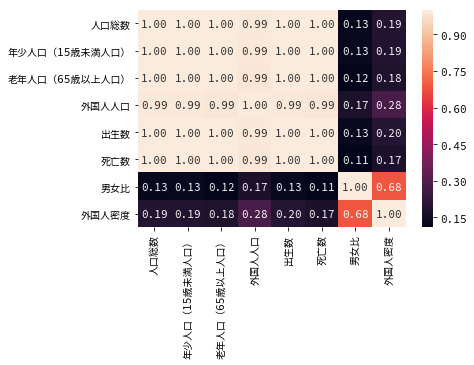

In [14]:
# もう一度df_pickupの分散・共分散行列を出力
sns.heatmap(df_pickup.corr(), annot=True, fmt='.2f')

[[ 1.65482264e+01 -9.85929394e-01 -3.49401484e-02 -4.80099203e-03]
 [-1.78729706e-01 -1.04968928e+00 -9.58625430e-02 -2.74081254e-02]
 [-6.85421873e-01 -1.22974635e+00  6.32586147e-02 -9.05118936e-03]
 [-6.62138866e-01 -1.00643172e+00  4.85859871e-02 -7.75832823e-03]
 [-5.05408760e-01 -6.60130517e-01  4.95259672e-03  1.60981963e-02]
 [-7.13934933e-01 -1.18863493e+00  6.99666611e-02 -1.82653644e-02]
 [-6.60705095e-01 -8.35049233e-01  4.12439669e-02 -8.60084432e-03]
 [-5.70735038e-01 -9.05831875e-01  1.91771329e-02 -7.76607139e-03]
 [-2.49229953e-01  7.49269715e-01 -6.73954947e-02 -1.51632080e-02]
 [-3.91713447e-01  6.33167416e-01 -6.02226313e-02 -3.87962095e-03]]


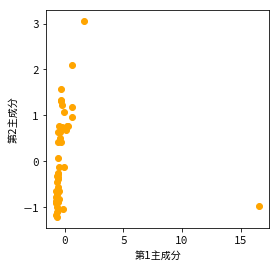

第一主成分の寄与率 第二主成分の寄与率 ... =  [8.61849821e-01 1.37040725e-01 1.03870481e-03 5.75002946e-05]

累積寄与率 =  [0.86184982 0.99889055 0.99992925 0.99998675]


In [15]:
# 「外国人密度」を付け加えたdf_pickupでもう一度主成分分析を行う
X2 = df_pickup.loc[:, df_pickup.columns != "男女比"].values
pca_summary(X2)

### まとめ
 いまだに第一主成分が幅を効かせ過ぎている感は否めないが、
 
 - 分散・共分散行列を見ると、「外国人密度」が
     - 他の説明変数と相関が低く、
     - かつ男女比との相関が0.68とそこそこ高いこと
 
 - 第一主成分寄与率が0.997から0.862まで下がったこと
 
 から、説明変数間の相関が高いときに、既存の説明変数を組み合わせて新しい説明変数を設計することが有効であることがわかった。